# From Brains to Bytes: A Deep Dive into the Multi-Layer Perceptron (MLP)

First, let's import all the libraries we'll need for our journey. We'll be using NumPy for numerical operations, Matplotlib and Seaborn for visualization, and Scikit-learn for datasets, preprocessing, and building our final model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn utilities
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set a consistent style for our plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')

## 🧠 Section 1: Modeling the Brain - An Introduction to the MLP

Welcome! In this notebook, we'll explore the Multi-Layer Perceptron (MLP), a fundamental building block of modern Artificial Intelligence and Deep Learning.

### What is an MLP? (The "Artificial Brain" Analogy)

At its core, an MLP is a mathematical model inspired by the biological brain. It's not a literal replica, but an abstraction. Here's the analogy:

- **Biological Brain:** A vast network of interconnected neurons that communicate via electrical signals. Learning happens by strengthening or weakening the connections (synapses) between them.
- **Artificial MLP:** A network of simple processing units called **nodes** or **neurons**, organized into layers. These artificial neurons are connected by **weighted connections**. The network "learns" by adjusting these weights based on the data it sees.

It's a **feedforward** network, meaning data flows in one direction: from the input layer, through the hidden layers, to the output layer, without any loops.

### The Universal Approximation Theorem: The Superpower of MLPs

What makes MLPs so special? Their power is formally captured by the **Universal Approximation Theorem**. In simple terms, it states:

> An MLP with just **one hidden layer** and a finite number of neurons can approximate **any continuous function** to any desired degree of accuracy.

**Analogy (LEGO Bricks):** 🧱
Think of the neurons in the hidden layer as simple, standardized building blocks, like LEGO bricks. Each neuron, with its non-linear activation function, can create a simple shape. The theorem tells us that by combining enough of these simple LEGO bricks (neurons), we can build an arbitrarily complex structure—we can approximate any function, no matter how wiggly or complicated.

This makes MLPs incredibly powerful and versatile learners.

### Role in AI & Dataset Introduction

The MLP is the ancestor of today's deep learning architectures. Understanding it is the first step toward mastering more complex models like Convolutional Neural Networks (CNNs) and Transformers.

Our main goal in this notebook is to build an MLP that can recognize handwritten digits from Scikit-learn's famous **Digits dataset**. Each data point is an 8x8 pixel image of a digit from 0 to 9.

## 🧬 Section 2: The Anatomy of a Neural Network

Let's dissect an MLP and look at its individual components.

### The Perceptron (or Node/Neuron)
The most basic unit. A neuron receives inputs, performs a simple computation (a weighted sum followed by an activation function), and passes the result to the next layer.

### Layers
Neurons are organized into layers:
- **Input Layer:** The entry point for our data. It doesn't perform any computation, it just passes the features to the first hidden layer. For our Digits dataset (8x8 images), this layer will have $8 \times 8 = 64$ nodes, one for each pixel.
- **Hidden Layers:** The computational core of the network. These layers are "hidden" between the input and output. It's here that the network learns to detect complex patterns and features from the data. We can have one or more hidden layers.
- **Output Layer:** The final layer that produces the network's prediction. For our digit classification task (digits 0-9), this layer will have **10 nodes**, one for each class.

### Weights and Biases
These are the **learnable parameters** of the network. They are the knobs that the training process tunes to make the model's predictions more accurate.
- **Weights ($W$):** Control the strength of the connection between two neurons. A large weight means the signal from one neuron has a strong influence on the next.
- **Biases ($b$):** An extra learnable parameter for each neuron that allows it to shift its activation function to the left or right, making it more flexible.

### Activation Functions: The Key to Non-Linearity
An activation function is a non-linear function applied to the output of a neuron. **This is arguably the most crucial component.** Without non-linear activations, an MLP, no matter how many layers it has, would just be a complicated linear model, incapable of learning complex patterns like those in the `make_moons` dataset or handwritten digits.

- **Hidden Layer Activation (ReLU):** The modern default choice. ReLU stands for Rectified Linear Unit. It's simple and computationally efficient. 
$$ f(x) = \operatorname{max}(0, x) $$
- **Output Layer Activation (Softmax):** Used for multi-class classification. It takes the raw scores (logits) from the final layer and squashes them into a probability distribution, where each output is between 0 and 1 and all outputs sum to 1.
$$ \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} \quad \text{for } i=1, \dots, K $$

## 🤔 Section 2.5: Designing the Architecture - A Practical Guide

Before diving into the math, a crucial practical question arises: How do we choose the number of layers, the number of neurons, and the activation functions? While there's no single magic formula, here are some widely-followed guidelines and rules of thumb.

---

### 1. How to Choose an Activation Function?

This choice is highly structured and depends on which layer you're designing.

**For the Hidden Layers:**
- **Use ReLU (Rectified Linear Unit)**: This is the modern default and your go-to choice. It's computationally simple and helps mitigate a problem called the "vanishing gradient," allowing for faster and more effective training of deeper networks. Variants like *Leaky ReLU* can also be used if you find your network has many "dead" neurons (neurons that are always outputting zero).

**For the Output Layer:**
The output activation is determined entirely by the **type of problem** you are solving:
- **Binary Classification** (e.g., spam or not spam): Use the **Sigmoid** function. It squashes the output to a value between 0 and 1, which can be interpreted as a probability.
- **Multi-Class Classification** (e.g., our Digits 0-9 task): Use the **Softmax** function. As we've seen, it produces a probability distribution across all classes, ensuring the outputs sum to 1.
- **Regression** (predicting a continuous value, e.g., house price): Use **no activation function** (or a "linear" identity function). You want the output to be able to take on any real value, so you don't want to constrain it.

---

### 2. How Many Hidden Layers?

The number of hidden layers determines the "depth" of your network.

- **Start with one hidden layer:** For many problems, one hidden layer is sufficient to achieve good performance, as guaranteed by the Universal Approximation Theorem. Always try a simple architecture first.
- **Add more layers for complexity:** Use two or more hidden layers if your data has a **hierarchical structure**. The idea is that each layer learns features of increasing complexity. For image recognition, for example:
  - *Layer 1* might learn to recognize simple edges and colors.
  - *Layer 2* might combine those edges to learn shapes like eyes, noses, or corners.
  - *Layer 3* might combine those shapes to recognize entire faces or objects.

Networks with many layers are what we call **Deep Neural Networks**, the foundation of Deep Learning.

---


### 3. How Many Neurons in a Hidden Layer?

This is the most unconstrained and experimental part of network design. There are no fixed rules, but here are some common starting points and principles:

- **Powers of 2:** It's common practice to choose numbers of neurons that are powers of 2 (e.g., 32, 64, 128, 256). This is mostly for computational efficiency on modern hardware (GPUs).
- **Balance is Key:**
  - **Too few neurons:** The network may not have enough capacity to learn the underlying patterns in the data, leading to **underfitting**.
  - **Too many neurons:** The network can easily memorize the training data, including its noise, leading to **overfitting**. It also increases computational cost and training time.
- **Common Heuristics (use with caution):**
  - The number of hidden neurons should be somewhere between the size of the input layer and the size of the output layer.
  - A common starting point is to use a number of neurons that is 2/3 the size of the input layer plus the size of the output layer.
- **Funnel Shape:** A common and often effective design is to make the layers progressively smaller as you move deeper into the network (e.g., `Input -> 256 neurons -> 128 neurons -> Output`). This acts as an information funnel, compressing the features into more and more abstract representations.

> **The Ultimate Rule:** The best way to determine the optimal number of layers and neurons is through **empirical experimentation**. Try several different architectures, train them, and evaluate their performance on a separate validation dataset. The one that performs best is your winner.

## 🔢 Section 3: The Mathematics of Forward Propagation

A "forward pass" or "forward propagation" is the process of taking an input and feeding it through the network to get a prediction. Here's the math for a simple 2-layer MLP (one hidden layer, one output layer).

Let $X$ be our input data matrix of shape `(n_samples, n_features)`.

#### 1. Input to Hidden Layer
First, we calculate the weighted sum of the inputs. This is a matrix multiplication between the input $X$ and the first weight matrix $W_1$ (shape `n_features, n_hidden_neurons`), plus the bias vector $b_1$ (shape `1, n_hidden_neurons`).

$$Z_1 = X \cdot W_1 + b_1$$

#### 2. Activation of Hidden Layer
Next, we apply the ReLU activation function element-wise to $Z_1$. This introduces non-linearity.
$$A_1 = \text{ReLU}(Z_1)$$
The result, $A_1$, is the output of the hidden layer and serves as the input for the next layer.

#### 3. Hidden to Output Layer
We repeat the process. The output of the hidden layer, $A_1$, is multiplied by the second weight matrix $W_2$ (shape `n_hidden_neurons, n_output_classes`) and the second bias vector $b_2$ is added.
$$Z_2 = A_1 \cdot W_2 + b_2$$

#### 4. Activation of Output Layer
Finally, the Softmax activation function is applied to the output logits $Z_2$ to get the final prediction matrix $\hat{y}$. This matrix contains the predicted probabilities for each class for each sample.
$$\hat{y} = \text{Softmax}(Z_2)$$

## 🔄 Section 4: How an MLP Learns - The Training Loop

A neural network learns through a cyclical process called the **training loop**. It's an iterative process of making a guess, measuring the error, and adjusting the parameters to do better next time.

Here is a summary of the training process:

1.  **Forward Propagation:** Input data is fed through the network as described in Section 3. The network makes a prediction (a "guess").

2.  **Loss Calculation:** The network's prediction is compared to the actual, true label using a **Loss Function**. For classification tasks, this is typically **Categorical Cross-Entropy**. The loss is a single number that quantifies how wrong the model's prediction was.

3.  **Backpropagation:** This is the magic of learning. The error (loss) is propagated *backward* through the network. Using calculus (specifically, the chain rule), we calculate the **gradient** of the loss with respect to every single weight and bias in the network. The gradient tells us the direction and magnitude to change each parameter to reduce the error.

4.  **Gradient Descent (Optimizer):** An **Optimizer** (like the popular **Adam** optimizer) uses these gradients to update all the network's weights and biases. It takes a small step in the direction that minimizes the loss, effectively making the network slightly smarter.

5.  **Epochs & Batches:** This entire `Forward -> Loss -> Backward -> Update` cycle is repeated many times. A single pass through the entire training dataset is called an **epoch**. Because processing the whole dataset at once is computationally expensive, we usually process it in small **batches** of data.

## 🛠️ Section 5: Building an MLP from Scratch (Pure Python & NumPy)

To truly understand how an MLP works, there's no substitute for building one from scratch. We will now implement the entire training loop using only NumPy. Our goal is to create a Python class that encapsulates the logic from Sections 3 and 4.

### Preparing the Data for our Scratch Model

Before we build the class, we need to prepare our data:
1.  Load the Digits dataset.
2.  Scale the features (pixels) to have zero mean and unit variance. This helps the training process converge faster and more reliably.
3.  **One-Hot Encode** the labels. Our scratch model's output will be a 10-element probability distribution from Softmax. To compare it with the true label, we need the label to be in the same format (e.g., the digit `3` becomes `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`).

In [7]:
# Load data
digits = load_digits()
X = digits.data
y = digits.target

# 1. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. One-hot encode the labels
n_samples = len(y)
n_classes = len(np.unique(y))
y_onehot = np.zeros((n_samples, n_classes))
y_onehot[np.arange(n_samples), y] = 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = train_test_split(
    X_scaled, y, y_onehot, test_size=0.3, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"y_train_onehot shape: {y_train_onehot.shape}")

X_train shape: (1257, 64)
y_train_onehot shape: (1257, 10)


### The `SimpleMLP` Class

Now we'll define our `SimpleMLP` class. It will contain methods for initialization, forward propagation, loss calculation, backpropagation, and the main training loop (`fit`).

In [8]:
class SimpleMLP:
    """A simple Multi-Layer Perceptron implementation from scratch using NumPy."""
    def __init__(self, input_size, hidden_size, output_size):
        """Initialize weights and biases with small random values."""
        # He initialization for ReLU activation
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size))
        # Xavier/Glorot initialization for softmax/linear output
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)
        self.b2 = np.zeros((1, output_size))

    def _relu(self, z):
        """ReLU activation function."""
        return np.maximum(0, z)
    
    def _relu_derivative(self, z):
        """Derivative of ReLU for backpropagation."""
        return (z > 0).astype(float)

    def _softmax(self, z):
        """Softmax activation function (numerically stable)."""
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def _forward(self, X):
        """Perform the forward pass and cache intermediate values."""
        # Layer 1: Input -> Hidden
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self._relu(self.Z1)
        
        # Layer 2: Hidden -> Output
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        y_pred = self._softmax(self.Z2)
        
        return y_pred

    def _compute_loss(self, y_true_onehot, y_pred):
        """Compute categorical cross-entropy loss."""
        # Add a small epsilon for numerical stability
        epsilon = 1e-9
        m = y_true_onehot.shape[0]
        loss = -np.sum(y_true_onehot * np.log(y_pred + epsilon)) / m
        return loss

    def _backward(self, X, y_true_onehot, y_pred):
        """Perform backpropagation to compute gradients."""
        m = X.shape[0]
        
        # Gradient of the loss with respect to the output layer's weighted sum (Z2)
        # For softmax + cross-entropy, this simplifies nicely
        dZ2 = y_pred - y_true_onehot
        
        # Gradients for W2 and b2
        self.dW2 = np.dot(self.A1.T, dZ2) / m
        self.db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        # Propagate gradient to the hidden layer (A1)
        dA1 = np.dot(dZ2, self.W2.T)
        
        # Gradient of the loss with respect to the hidden layer's weighted sum (Z1)
        dZ1 = dA1 * self._relu_derivative(self.Z1)
        
        # Gradients for W1 and b1
        self.dW1 = np.dot(X.T, dZ1) / m
        self.db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
    def fit(self, X, y_onehot, epochs, learning_rate):
        """The main training loop."""
        self.loss_history = []
        
        for epoch in range(epochs):
            # 1. Forward Propagation
            y_pred = self._forward(X)
            
            # 2. Compute Loss
            loss = self._compute_loss(y_onehot, y_pred)
            self.loss_history.append(loss)
            
            # 3. Backpropagation
            self._backward(X, y_onehot, y_pred)
            
            # 4. Update Weights (Gradient Descent)
            self.W1 -= learning_rate * self.dW1
            self.b1 -= learning_rate * self.db1
            self.W2 -= learning_rate * self.dW2
            self.b2 -= learning_rate * self.db2
            
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
                
    def predict(self, X):
        """Make predictions on new data."""
        y_pred_probs = self._forward(X)
        return np.argmax(y_pred_probs, axis=1)

### Training Our Scratch MLP

Let's instantiate our `SimpleMLP` and train it on the Digits data. We'll use a hidden layer with 128 neurons. After training, we will plot the loss history to see if our model learned effectively.

Epoch 100/1500, Loss: 0.1799
Epoch 200/1500, Loss: 0.0980
Epoch 300/1500, Loss: 0.0648
Epoch 400/1500, Loss: 0.0469
Epoch 500/1500, Loss: 0.0360
Epoch 600/1500, Loss: 0.0287
Epoch 700/1500, Loss: 0.0235
Epoch 800/1500, Loss: 0.0198
Epoch 900/1500, Loss: 0.0169
Epoch 1000/1500, Loss: 0.0147
Epoch 1100/1500, Loss: 0.0130
Epoch 1200/1500, Loss: 0.0116
Epoch 1300/1500, Loss: 0.0104
Epoch 1400/1500, Loss: 0.0094
Epoch 1500/1500, Loss: 0.0086


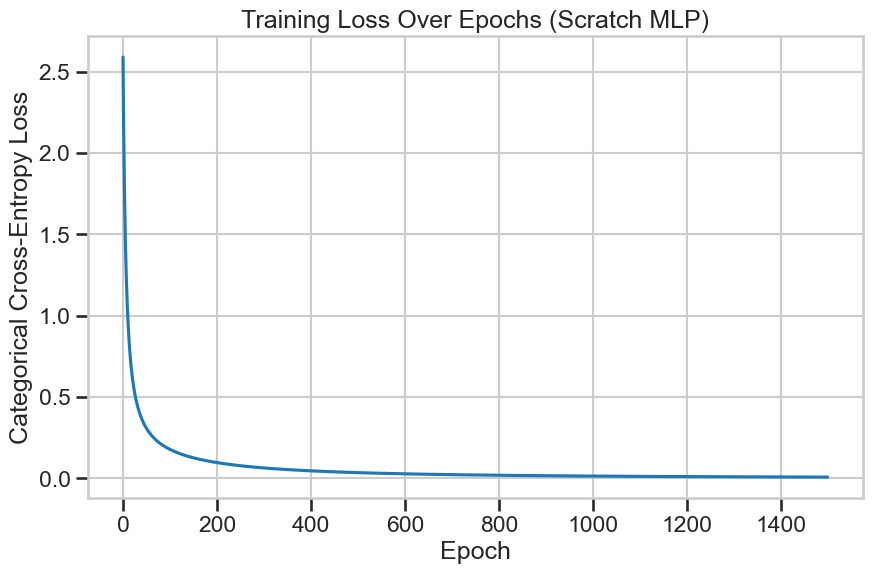

In [9]:
# Define model architecture
input_size = X_train.shape[1]
hidden_size = 128
output_size = y_train_onehot.shape[1]

# Instantiate and train the model
scratch_mlp = SimpleMLP(input_size, hidden_size, output_size)
scratch_mlp.fit(X_train, y_train_onehot, epochs=1500, learning_rate=0.1)

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(scratch_mlp.loss_history)
plt.title('Training Loss Over Epochs (Scratch MLP)')
plt.xlabel('Epoch')
plt.ylabel('Categorical Cross-Entropy Loss')
plt.show()

### Evaluating Our Scratch MLP

Now, let's see how well our handmade model performs on the unseen test data.

In [11]:
# Make predictions on the test set
y_pred_scratch = scratch_mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_scratch)
print(f"Accuracy of our scratch MLP: {accuracy:.4f}")

Accuracy of our scratch MLP: 0.9778


## 🚀 Section 6: The Easy Way - Implementation with Scikit-learn

Building an MLP from scratch is a fantastic learning experience, but in practice, we use well-tested, optimized libraries like Scikit-learn, TensorFlow, or PyTorch. Let's now build the same digit recognizer using Scikit-learn's `MLPClassifier`.

### Feature Scaling: Mandatory!
Neural networks are sensitive to feature scaling. We must scale our data, typically to have a mean of 0 and a standard deviation of 1. We already did this, but it's a critical step worth repeating.

### Designing the Architecture & Training

With `MLPClassifier`, we can define the entire architecture in one line. Let's create a model with two hidden layers, one with 100 neurons and a second with 50.

Key hyperparameters:
- `hidden_layer_sizes`: A tuple defining the number of neurons in each hidden layer.
- `activation`: The activation function for hidden layers (we'll use `'relu'`).
- `solver`: The optimization algorithm. `'adam'` is a robust default.
- `alpha`: The L2 regularization parameter (we'll discuss this in the next section).
- `learning_rate_init`: The initial learning rate.
- `max_iter`: The number of epochs.

In [10]:
# We use the original y_train/y_test labels, not the one-hot encoded ones
# Scikit-learn handles the encoding internally.

# Instantiate the MLPClassifier
sklearn_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50), # Two hidden layers
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    verbose=False # Set to True to see training progress
)

# Train the model
sklearn_mlp.fit(X_train, y_train)

# Evaluate the model
y_pred_sklearn = sklearn_mlp.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Accuracy of Scikit-learn MLP: {accuracy_sklearn:.4f}")

Accuracy of Scikit-learn MLP: 0.9759


## ⚠️ Section 7: The Challenge of Overfitting & Regularization

Because of their immense flexibility (thanks to the Universal Approximation Theorem), MLPs are prone to a major problem: **overfitting**. 

Overfitting occurs when a model learns the training data *too* well, including its noise and random fluctuations. The model effectively "memorizes" the training set instead of learning the underlying general pattern. An overfit model performs great on training data but fails badly on new, unseen data.

We can diagnose overfitting by plotting the training loss against a **validation loss**. If the training loss continues to decrease while the validation loss starts to increase, the model is overfitting.

### Regularization Techniques

To combat overfitting, we use **regularization** techniques, which are methods to constrain the model's complexity.

- **L2 Regularization:** This technique adds a penalty to the loss function based on the squared magnitude of the model's weights. It encourages the model to use smaller weights, leading to a simpler, smoother decision boundary that generalizes better. In `MLPClassifier`, this is controlled by the `alpha` parameter. A higher `alpha` means stronger regularization.

- **Early Stopping:** This is a simple but highly effective technique. We monitor the model's performance on a validation set during training and stop the training process as soon as the validation performance stops improving (or starts to get worse). In `MLPClassifier`, we can set `early_stopping=True`.

Let's train a new, regularized model to see if we can improve our performance.

In [12]:
# Instantiate a regularized MLPClassifier
regularized_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.001,  # Added L2 regularization
    max_iter=500,
    random_state=42,
    early_stopping=True, # Enabled early stopping
    n_iter_no_change=10, # Stop if validation score doesn't improve for 10 epochs
    validation_fraction=0.1 # Use 10% of training data for validation
)

# Train the model
regularized_mlp.fit(X_train, y_train)

# Evaluate the regularized model
y_pred_reg = regularized_mlp.predict(X_test)
accuracy_reg = accuracy_score(y_test, y_pred_reg)

print(f"Accuracy of Regularized Scikit-learn MLP: {accuracy_reg:.4f}")
print(f"Model stopped at epoch: {regularized_mlp.n_iter_}")

Accuracy of Regularized Scikit-learn MLP: 0.9611
Model stopped at epoch: 31


## 📊 Section 8: Evaluation & Interpretation

Accuracy is a good starting point, but a more detailed evaluation gives us deeper insights. We'll use a **Classification Report** and a **Confusion Matrix**.

A **Classification Report** provides precision, recall, and F1-score for each class, which is useful for understanding if the model struggles with specific digits. A **Confusion Matrix** shows us exactly which digits are being confused with which other digits.

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      0.90      0.92        50
           2       0.92      0.98      0.95        47
           3       1.00      0.94      0.97        54
           4       0.97      1.00      0.98        60
           5       0.97      0.94      0.95        66
           6       0.96      0.98      0.97        53
           7       1.00      0.98      0.99        55
           8       0.89      0.95      0.92        43
           9       0.95      0.93      0.94        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



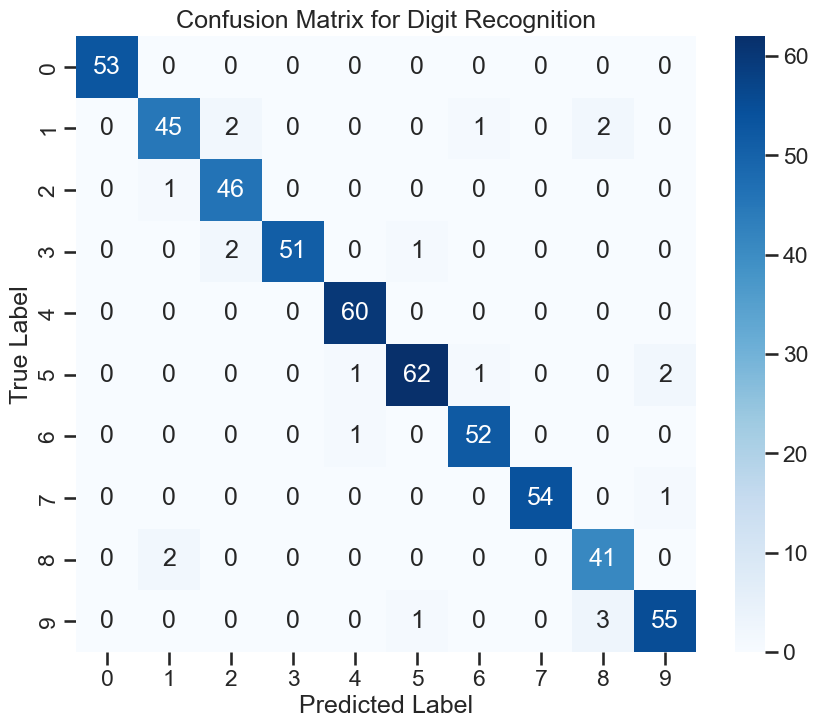

In [13]:
# Generate the Classification Report
print("--- Classification Report ---")
print(classification_report(y_test, y_pred_reg))

# Generate and plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_reg)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Confusion Matrix for Digit Recognition')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Interpretation: Peeking Inside the Black Box

MLPs are often called "black box" models because their decision-making process can be hard to interpret. However, we can try to get some insight. One common technique is to visualize the weights connecting the input layer to the first hidden layer. Each neuron in the first hidden layer learns to respond to a specific pattern in the input pixels. By reshaping its incoming weight vector into an 8x8 image, we can see what pattern that neuron has learned to detect.

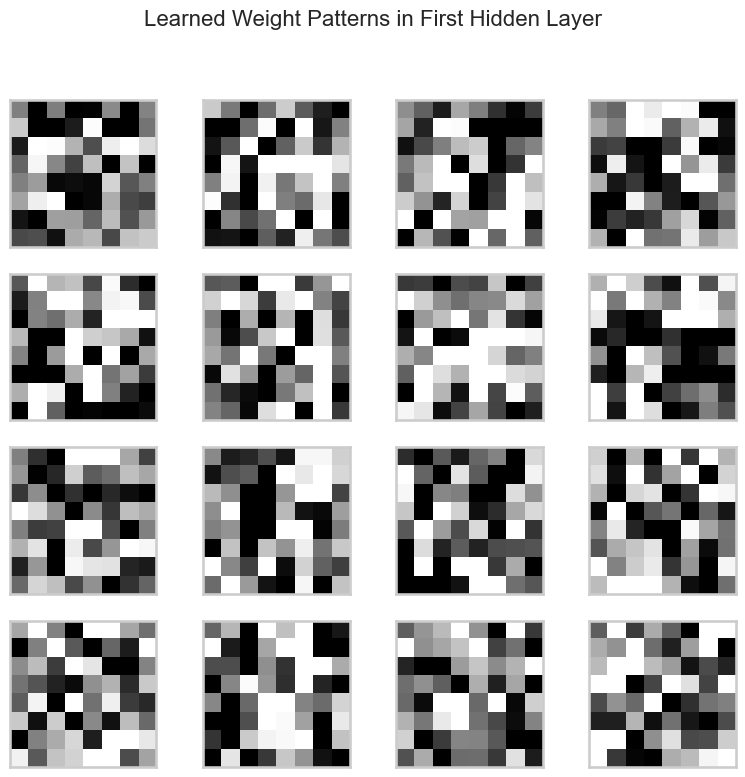

In [14]:
# The weights connecting input to the first hidden layer
weights = regularized_mlp.coefs_[0]

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
vmin, vmax = weights.min(), weights.max()

for coef, ax in zip(weights.T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

fig.suptitle('Learned Weight Patterns in First Hidden Layer', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## ✅ Section 9: Conclusion

We have completed a comprehensive journey through the Multi-Layer Perceptron. We started with the biological inspiration, understood its power through the Universal Approximation Theorem, and dissected its anatomy. We then built one from scratch using NumPy to master the mechanics of forward and backward propagation before using the powerful and convenient `MLPClassifier` from Scikit-learn.

Finally, we addressed the critical issue of overfitting with regularization and learned how to evaluate and even peek inside our trained model.

### Key Takeaways

- **Strengths:**
  - **Power & Flexibility:** Can learn highly complex, non-linear relationships in data.
  - **Universal Approximators:** Can model any continuous function, making them applicable to a wide range of problems.

- **Weaknesses:**
  - **Prone to Overfitting:** Their flexibility is a double-edged sword that requires careful regularization.
  - **Computationally Expensive:** Training can require significant time and resources, especially for large datasets and deep architectures.
  - **Less Interpretable:** Often considered "black boxes" compared to simpler models like linear regression or decision trees.

Understanding the MLP is the gateway to the exciting and rapidly evolving world of Deep Learning. Congratulations on taking this crucial step!